In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

[*********************100%%**********************]  1 of 1 completed


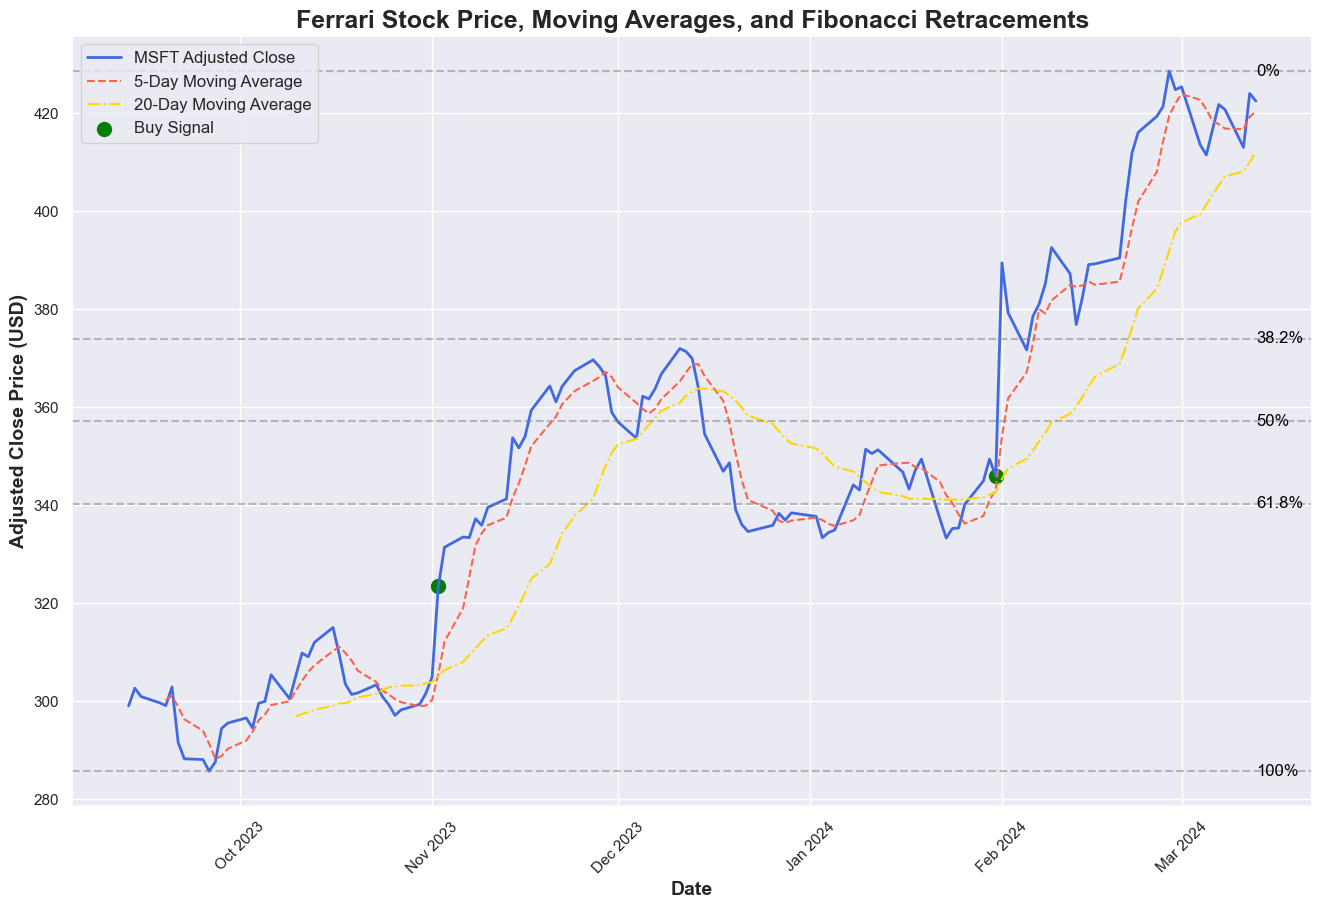

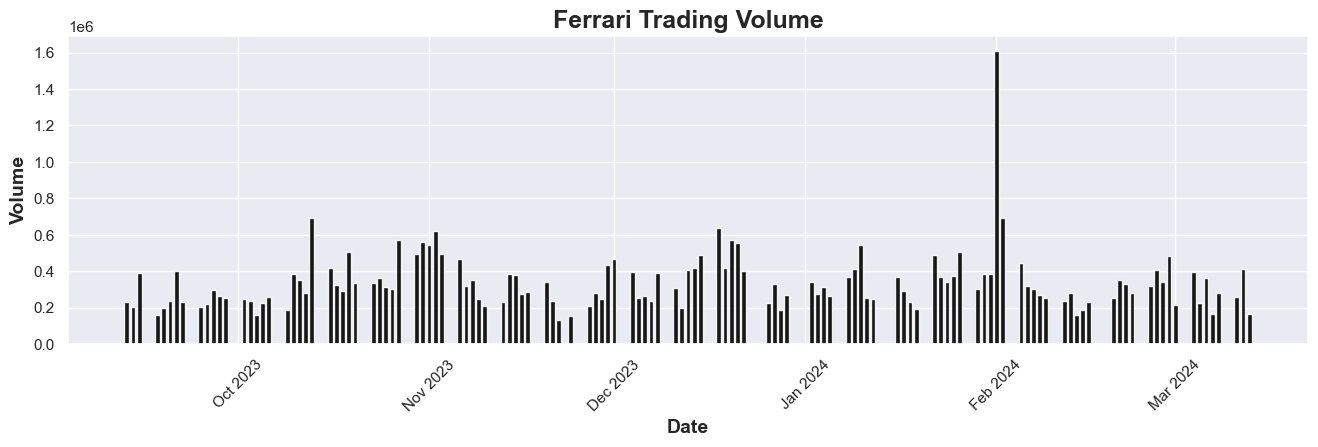

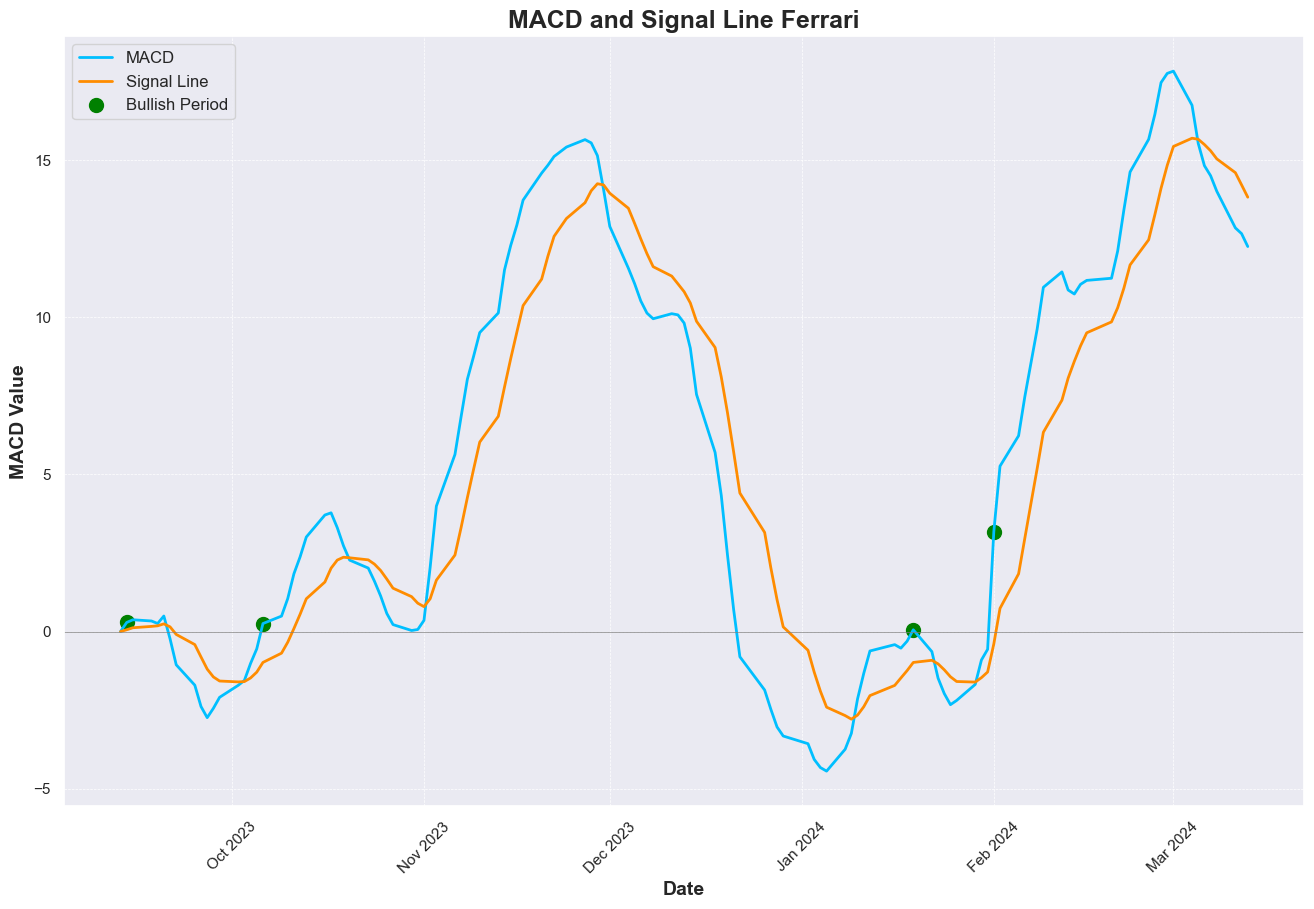

In [30]:
sns.set_theme(style='darkgrid')

#Start and end dates
start_date = '2023-09-13'
end_date = pd.to_datetime('now').strftime('%Y-%m-%d')

#Download data
data = yf.download(
    'RACE',
    start=start_date,
    end=end_date, 
    interval='1d'
)

#Indicators
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
data['MA5_prev'] = data['MA5'].shift(1)
data['MA20_prev'] = data['MA20'].shift(1)
data['MACD'] = data['Adj Close'].ewm(
    span=12, 
    adjust=False).mean() - data['Adj Close'].ewm(
    span=26, adjust=False
).mean()
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['Buy_Signal'] = (
    (data['MA5'] > data['MA20']) &
    (data['MA5_prev'] <= data['MA20_prev']) &
    (data['MA5'] > data['MA5'].shift()) &
    (data['MA20'] > data['MA20'].shift())
)
data['Bullish_Mkt'] = (data['MACD'] > 0) & (data['MACD'].shift(1) <= 0)

#Fibonacci Retracement Levels
low_price = data['Adj Close'].min()
high_price = data['Adj Close'].max()
fib_levels = [0, 38.2, 50, 61.8, 100]
price_dif = high_price - low_price
fib_retracements = {
    level: high_price - (price_dif * (level / 100)
                        ) for level in fib_levels
}

#Plot 1: Price and MAs with Buy Signals and Fibonacci Retracements
plt.figure(figsize=(16, 10))
plt.plot(
    data.index, 
    data['Adj Close'], 
    label='MSFT Adjusted Close', 
    color='royalblue', 
    linewidth=2
)
plt.plot(
    data.index, 
    data['MA5'], 
    label='5-Day Moving Average', 
    color='tomato', 
    linestyle='--'
)
plt.plot(
    data.index, 
    data['MA20'], 
    label='20-Day Moving Average', 
    color='gold', 
    linestyle='-.'
)

#Fibonacci levels to the plot and annotate
for level, retracement_price in fib_retracements.items():
    plt.axhline(
        y=retracement_price, 
        color='grey', 
        linestyle='--', 
        alpha=0.5)
    plt.text(
        x=data.index[-1], 
        y=retracement_price, 
        s=f'{level}%', 
        verticalalignment='center', 
        fontsize=12, 
        color='black'
    )

plt.scatter(
    data.index[data['Buy_Signal']], 
    data['Adj Close'][data['Buy_Signal']], 
    color='green', 
    label='Buy Signal', 
    marker='o', 
    s=100
)
plt.title(
    'Ferrari Stock Price, Moving Averages, and Fibonacci Retracements', 
    fontsize=18, 
    fontweight='bold'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

#Plot 2: Volume
plt.figure(figsize=(16, 4))
plt.bar(data.index, data['Volume'], color='black', alpha=0.9)
plt.title('Ferrari Trading Volume', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

#Plot 3: MACD, Signal Line, and Equilibrium Line with Bullish Signals
plt.figure(figsize=(16, 10))
plt.plot(
    data.index, 
    data['MACD'], 
    label='MACD', 
    color='deepskyblue', 
    linewidth=2
)
plt.plot(
    data.index, 
    data['Signal_Line'], 
    label='Signal Line', 
    color='darkorange',
    linewidth=2
)
plt.axhline(0, color='grey', linewidth=0.5) 
plt.scatter(
    data.index[data['Bullish_Mkt']], 
    data['MACD'][data['Bullish_Mkt']], 
    color='green', 
    label='Bullish Period', 
    marker='o',
    s=100
)
plt.title(
    'MACD and Signal Line Ferrari', 
    fontsize=18, 
    fontweight='bold'
)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MACD Value', fontsize=14)
plt.legend(fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()

[*********************100%%**********************]  1 of 1 completed


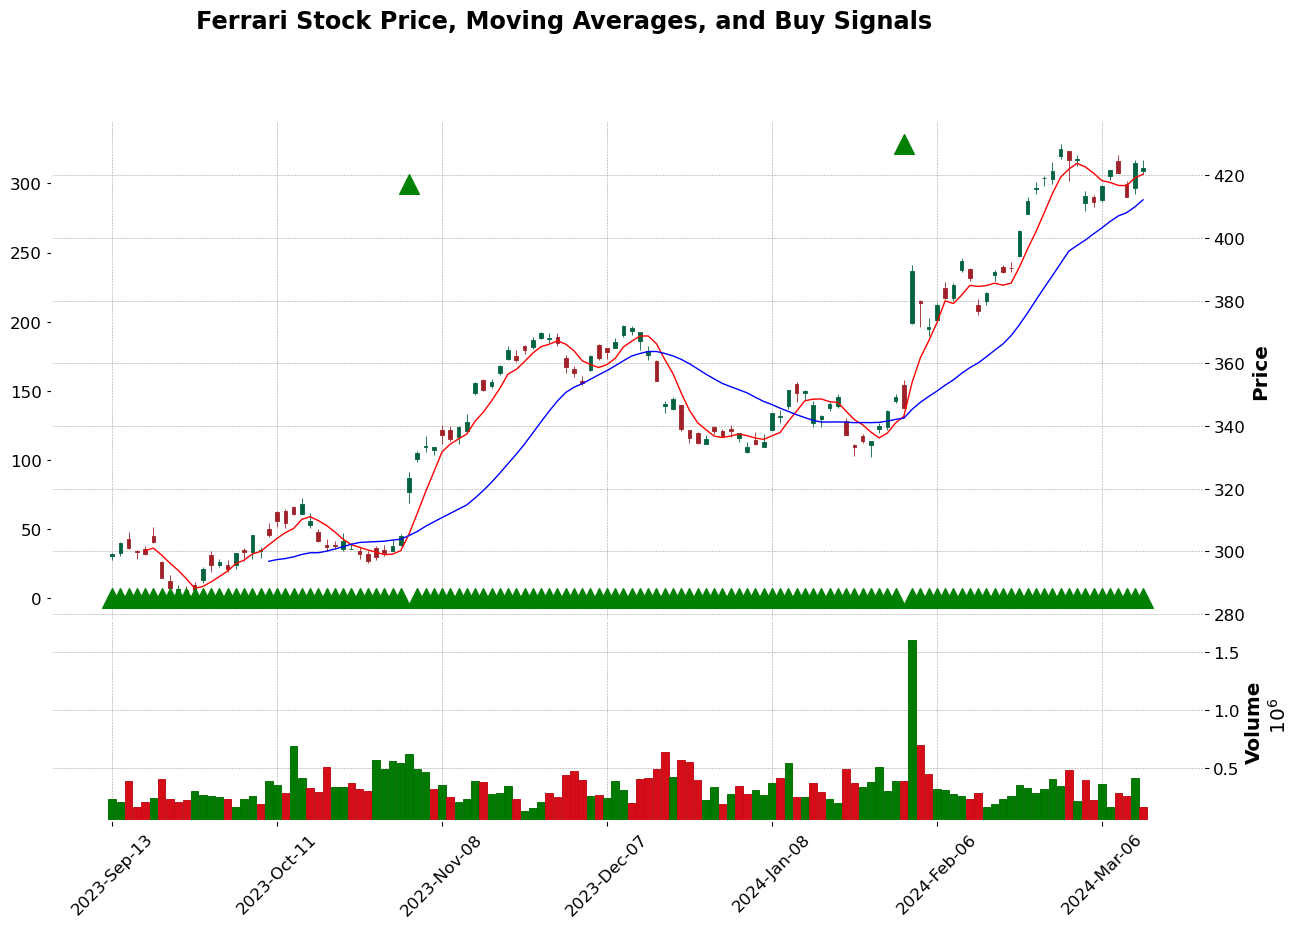

In [31]:
sns.set_theme(style='darkgrid')

#Start and end dates
start_date = '2023-09-13'
end_date = pd.to_datetime('now').strftime('%Y-%m-%d')

#Download data
data = yf.download(
    'RACE', 
    start=start_date, 
    end=end_date, 
    interval='1d'
)

#Indicators
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
data['MA5_prev'] = data['MA5'].shift(1)
data['MA20_prev'] = data['MA20'].shift(1)
data['MACD'] = data['Adj Close'].ewm(
    span=12, 
    adjust=False).mean() - data['Adj Close'].ewm(
    span=26, adjust=False
).mean()
data['Signal_Line'] = data['MACD'].ewm(
    span=9, adjust=False
).mean()
data['Buy_Signal'] = (
    (data['MA5'] > data['MA20']) &
    (data['MA5_prev'] <= data['MA20_prev']) &
    (data['MA5'] > data['MA5'].shift()) &
    (data['MA20'] > data['MA20'].shift())
)
data['Bullish_Mkt'] = (data['MACD'] > 0) & (data['MACD'].shift(1) <= 0)

#Market data for mplfinance
market_data = data[
    ['Open', 'High', 'Low', 'Close', 'Volume']
].copy()

# plots for MA5, MA20, and Buy Signals
addplots = [
    mpf.make_addplot(
        data['MA5'], 
        color='red', 
        linestyle='-', 
        width=1
    ),
    mpf.make_addplot(
        data['MA20'], 
        color='blue', 
        linestyle='-', 
        width=1
    ),
    mpf.make_addplot(
        data['Buy_Signal'] * data['Low'] * 0.95, 
        type='scatter', 
        markersize=200, 
        marker='^', 
        color='green', 
        alpha=1
    ),
]

#Plotting the candlestick chart
mpf_style = mpf.make_mpf_style(
    base_mpf_style='charles', 
    rc={'font.size': 12}
)
mpf.plot(
    market_data, 
    type='candle', 
    addplot=addplots, 
    style=mpf_style, 
    figsize=(16, 10), 
    volume=True, 
    title='Ferrari Stock Price, Moving Averages, and Buy Signals', 
    ylabel='Price', 
    ylabel_lower='Volume'
)